In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

## Anova

In [2]:
# Importando base de dados
tratamento = pd.read_csv('../Dados/Anova.csv', sep =';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


<AxesSubplot:title={'center':'Horas'}, xlabel='[Remedio]'>

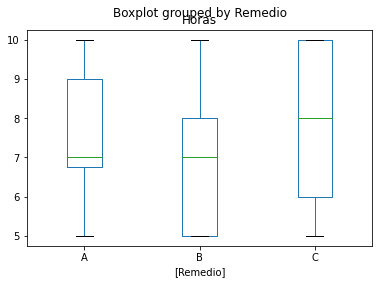

In [6]:
# Gerando gráfico box plot
tratamento.boxplot(by = 'Remedio', grid = False)

In [7]:
# Criando regressão para utilização da Anova
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()
resultado1 = sm.stats.anova_lm(modelo1)

In [8]:
# Criando regressão múltipla para utilização da Anova
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)

In [9]:
# Executando teste de Tukey para comparar os resultados
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


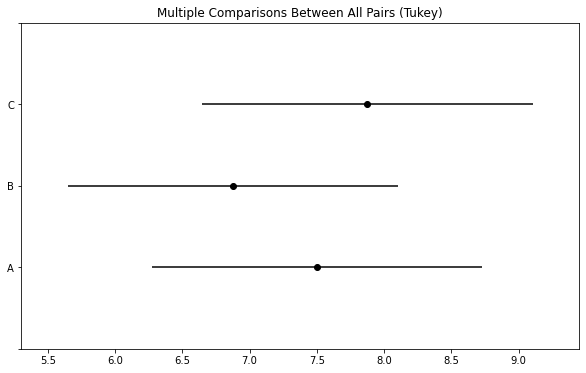

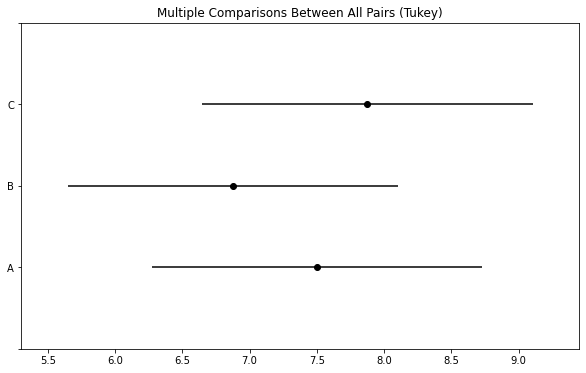

In [10]:
# Gerando gráfico do resultado
resultado_teste.plot_simultaneous()